In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.image as mpimg
import cv2
from CNNsig import sigGF, sigG
from batch_wrapper import batch_dataset

In [2]:
DATA_DIR = './data/'

In [3]:
class stroke_sample:
    def __init__(self, img, uid, forgery, sid, elapsed_time):
        self.img = img
        self.uid = uid
        self.forgery = forgery
        self.sid = sid
        self.elapsed_time = elapsed_time

In [4]:
def load_image_details(directory):
    imgs=[]; uids=[]; sids=[]; is_fs=[]; ts=[];
    
    files = [f for f in os.listdir(directory)]
    for f in files:
        fs = f.split("_")
        img = cv2.imread(directory+f) # image binary data
        uid = int(fs[1][1:]) # user id
        is_f = 0
        if int(fs[2]) < 21:
            is_f = 0 # is it forgery?
        else:
            is_f = 1
        sid = int(fs[3]) # stroke id
        t = int(fs[4][:-4]) # elapsed time
        
        imgs.append(img); uids.append(uid-1); is_fs.append(is_f)
        sids.append(sid); ts.append(t)
    imgs = np.array(imgs)
    uids = np.array(uids)
    sids = np.array(sids)
    is_fs = np.array(is_fs)
    ts = np.array(np)
    return imgs, uids, sids, is_fs, ts

In [5]:
imgs, uids, sids, is_fs, ts = load_image_details(DATA_DIR)

Training Model Setting

In [6]:
img_shape = imgs[0].shape
num_person = len(np.unique(uids))
print ("The shape of image: ", img_shape)
print ("The number of persons: ", num_person)

The shape of image:  (350, 470, 3)
The number of persons:  40


In [37]:
Y_uid = np.eye(num_person)[uids]
Y_isF = np.eye(2)[is_fs.astype(np.uint8)]

# Shuffle input and output data
idx = np.arange(len(imgs))
np.random.shuffle(idx)
shuffled_X = np.array(imgs[idx])
shuffled_Y_M = np.array(Y_uid[idx])
shuffled_Y_D = np.array(Y_isF[idx])

MemoryError: 

In [8]:
GF_model = sigGF(img_shape, num_person)

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50
total_batch = int(len(imgs) / batch_size)
print ("batch num = %d" % total_batch)

batch num = 177


In [10]:
batch_X = batch_dataset(imgs, batch_size)
batch_Y_M = batch_dataset(Y_uid, batch_size)
batch_Y_D = batch_dataset(Y_isF, batch_size)

In [11]:
for epoch in range(10):
    total_cost_M = 0
    total_cost_D = 0
    
    for i in range(total_batch):
        batch_x = batch_X.next_batch()
        batch_y_m = batch_Y_M.next_batch()
        batch_y_d = batch_Y_D.next_batch()
        _, cost_M_val,cost_D_val = GF_model.train(sess, batch_x, batch_y_m, batch_y_d)
        total_cost_M += cost_M_val
        total_cost_D += cost_D_val
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost_M =', '{:.3f}'.format(total_cost_M / total_batch),
          'Avg. cost_D =', '{:.3f}'.format(total_cost_D / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost_M = 3.737 Avg. cost_D = 1.533
Epoch: 0002 Avg. cost_M = 3.690 Avg. cost_D = 0.693
Epoch: 0003 Avg. cost_M = 3.680 Avg. cost_D = 0.693
Epoch: 0004 Avg. cost_M = 3.676 Avg. cost_D = 0.693
Epoch: 0005 Avg. cost_M = 3.669 Avg. cost_D = 0.693
Epoch: 0006 Avg. cost_M = 3.663 Avg. cost_D = 0.694
Epoch: 0007 Avg. cost_M = 3.657 Avg. cost_D = 0.694
Epoch: 0008 Avg. cost_M = 3.649 Avg. cost_D = 0.694
Epoch: 0009 Avg. cost_M = 3.640 Avg. cost_D = 0.694
Epoch: 0010 Avg. cost_M = 3.632 Avg. cost_D = 0.694
최적화 완료!


In [12]:
GF_model.saver.save(sess, "./save/train_withF_nontrainable",11)

'./save/train_withF_nontrainable-11'

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

GF_model.saver.restore(sess, "./save/train_withF_nontrainable-11")

INFO:tensorflow:Restoring parameters from ./save/train_withF_nontrainable-11


In [19]:
acc1,acc2 = GF_model.test(sess, imgs[:100],Y_uid[:100],Y_isF[:100])
print(acc1)
print(acc2)

0.0
0.58


In [22]:
encoded_X = GF_model.get_feature(sess, imgs[:100])

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates
from data_preprocessing import print_arr

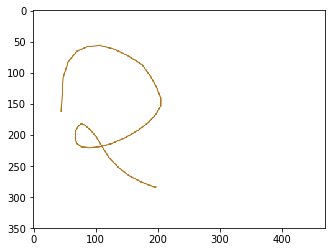

In [28]:
print_arr(imgs[1])

In [36]:
GF_model.Y_M.shape

TensorShape([Dimension(None), Dimension(40)])